In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv('irisData.csv',index_col=0)
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
df.describe(include='all')

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count      150.000000    150.000000     150.000000    150.000000   
unique            NaN           NaN            NaN           NaN   
top               NaN           NaN            NaN           NaN   
freq              NaN           NaN            NaN           NaN   
mean         5.843333      3.054000       3.758667      1.198667   
std          0.828066      0.433594       1.764420      0.763161   
min          4.300000      2.000000       1.000000      0.100000   
25%          5.100000      2.800000       1.600000      0.300000   
50%          5.800000      3.000000       4.350000      1.300000   
75%          6.400000      3.300000       5.100000      1.800000   
max          7.900000      4.400000       6.900000      2.500000   

                Species  
count               150  
unique                3  
top     Iris-versicolor  
freq                 50  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN

In [4]:
df.corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
X=df.iloc[:,0:4]
y=df.iloc[:,[4]]
y.head()

Species
Id             
1   Iris-setosa
2   Iris-setosa
3   Iris-setosa
4   Iris-setosa
5   Iris-setosa

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=.25)
y_train.shape

(112, 1)

In [8]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.9736842105263158

In [9]:
clf.score(X_train,y_train)

0.9821428571428571

In [10]:
predict=clf.predict(X_test)

In [11]:
pd.DataFrame({'feature':X.columns,'importance':clf.feature_importances_})

feature  importance
0  SepalLengthCm    0.000000
1   SepalWidthCm    0.000000
2  PetalLengthCm    0.931678
3   PetalWidthCm    0.068322

# using iris data 

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [13]:
ds=load_iris()
x=pd.DataFrame(ds.data,columns=ds.feature_names)
y=ds.target
print(x.head())
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [15]:
from sklearn.tree import DecisionTreeClassifier
dclf=DecisionTreeClassifier(max_depth=3,criterion='entropy')
dclf.fit(X_train,y_train)
dclf.score(X_train,y_train)

0.9821428571428571

In [16]:
dclf.score(X_test,y_test)

0.9736842105263158

In [17]:
pd.DataFrame({'feature':x.columns,'importance':dclf.feature_importances_})

feature  importance
0  sepal length (cm)    0.000000
1   sepal width (cm)    0.000000
2  petal length (cm)    0.330609
3   petal width (cm)    0.669391

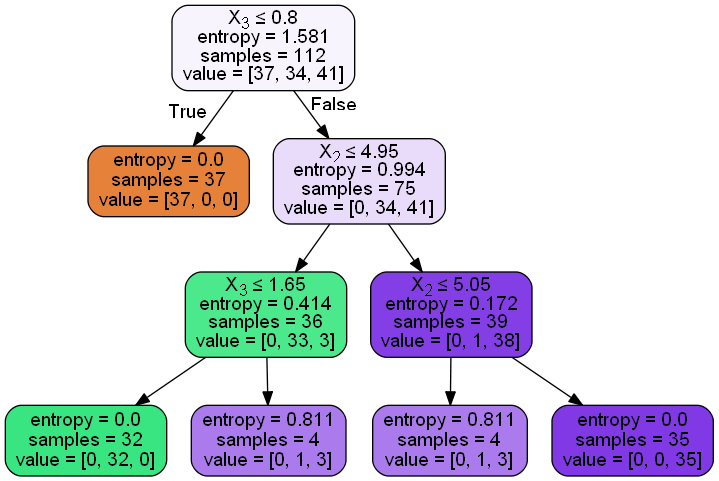

In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dclf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
